In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'data.csv')

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
df.dropna(subset=['x1','x2'],inplace=True)

In [7]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [8]:
df['x2'].describe()

count    2.219000e+03
mean     8.967782e+04
std      2.986680e+06
min     -1.348761e+02
25%     -8.025966e+01
50%     -1.566092e+00
75%      6.390448e+01
max      1.000000e+08
Name: x2, dtype: float64

In [9]:
df['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

<AxesSubplot:>

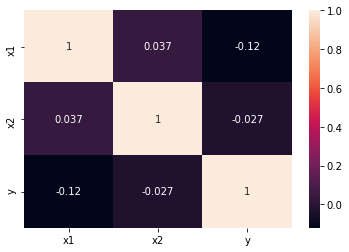

In [10]:
sns.heatmap(df.corr(),annot=True)

-  All values are almost nearer to '0'. So there is no correlation between columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

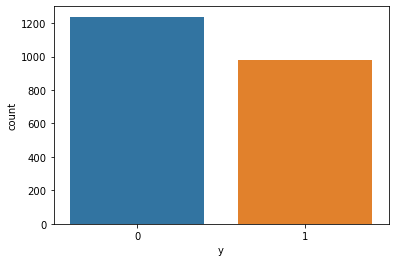

In [11]:
sns.countplot(df['y'])

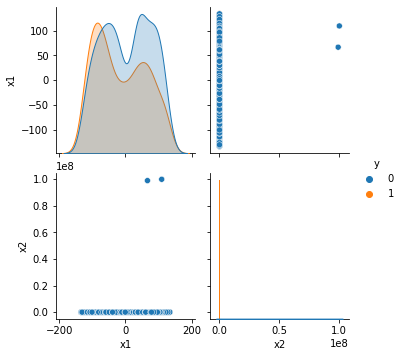

In [12]:
sns.pairplot(df,hue='y')

- The above graph shows that the given dataset is a balanced dataset and there are 0's compared to 1's

## Standardisation

In [13]:
Output = df['y']
data = df.drop('y',axis=1)

In [14]:
data.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [15]:
Output.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [16]:
data.shape

(2219, 2)

In [17]:
Output.shape

(2219,)

In [18]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(2219, 2)


# Data Splitting

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, 
                                                   Output, 
                                                   test_size = 0.3, 
                                                   random_state = 0)

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = logistic.predict(X_test)

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)


0.6066066066066066

## SVM with Linear Kernal

In [23]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred = svm.predict(X_test)

In [25]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[378,   0],
       [288,   0]], dtype=int64)

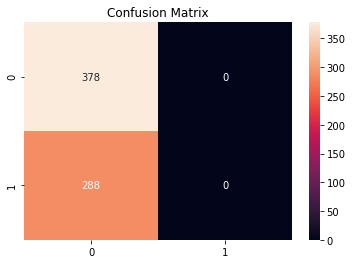

In [26]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.5675675675675675

## SVM with RBF

In [28]:
from sklearn.svm import SVC
svr = SVC(kernel = 'rbf')
svr.fit(X_train, y_train)

SVC()

In [29]:
y_pred = svr.predict(X_test)

In [30]:
con = metrics.confusion_matrix(y_test, y_pred)
con

array([[305,  73],
       [186, 102]], dtype=int64)

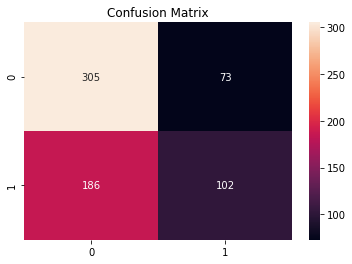

In [31]:
sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.6111111111111112

In [33]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(
    SVC(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.9804568024056097, 'C': 1}
SVC(C=1, gamma=0.9804568024056097)

0.6096096096096096


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=7)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [35]:
y_test_pred = DT.predict(X_test)

In [36]:
metrics.accuracy_score(y_test, y_test_pred)

0.9354354354354354

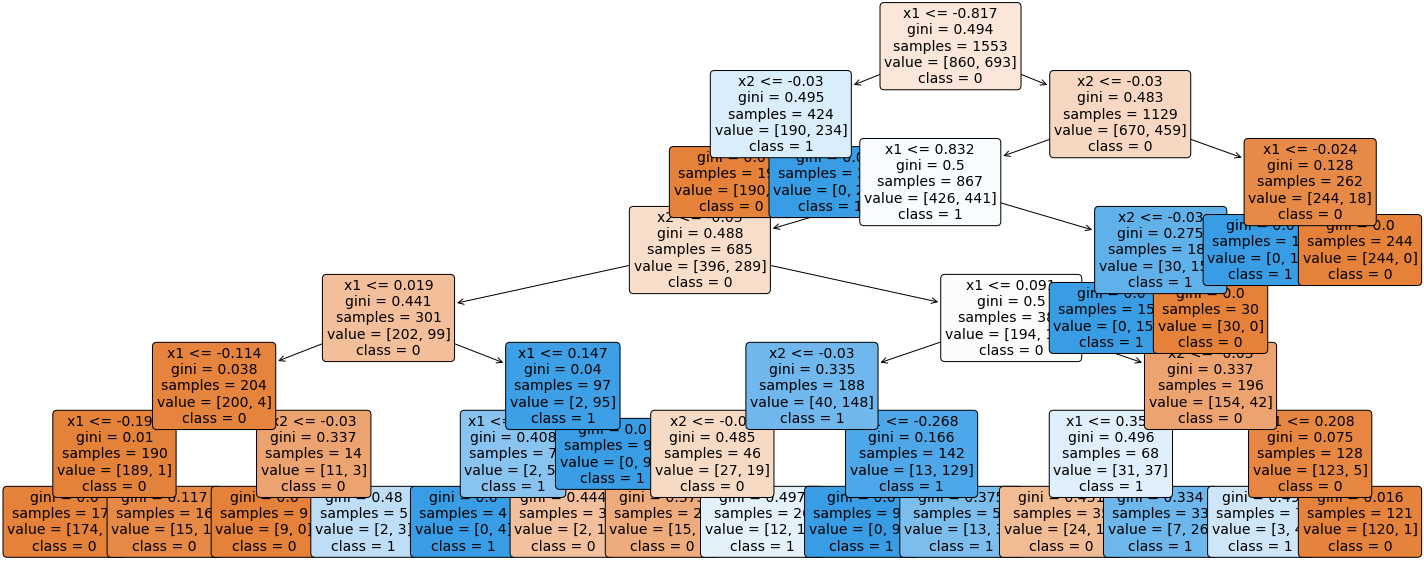

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(DT, feature_names = ['x1','x2'] ,
              class_names = ['0','1'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

# K-Nearest Neighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [40]:
y_pred = knn.predict(X_test)

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.5735735735735735

In [42]:
# Hyperparameter Tuning
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1, 2, 3]}]

clf = RandomizedSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 3, 'n_neighbors': 6}
KNeighborsClassifier(n_neighbors=6, p=3)

0.5765765765765766


### Decision Tree gives more accuracy compared to all other models . 